In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/shuzh/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [1]:
from tqdm import tqdm

In [5]:
data = pd.read_csv('./Pydata/imc_df_259p_64f.csv')

In [7]:
#data.columns

In [6]:
#col_subset =  ['Unnamed: 0', '1021522Tm169Di EGFR', '1031747Er167Di ECadhe', '112475Gd156Di Estroge', '117792Dy163Di GATA3', '1261726In113Di Histone', '1441101Er168Di Ki67', '174864Nd148Di SMA', '1921755Sm149Di Vimenti', '198883Yb176Di cleaved', '201487Eu151Di cerbB', '207736Tb159Di p53', '234832Lu175Di panCyto', '3111576Nd143Di Cytoker', '312878Gd158Di Progest', '322787Nd150Di cMyc', '3281668Nd142Di Fibrone', '346876Sm147Di Keratin', '3521227Gd155Di Slug', '361077Dy164Di CD20', '378871Yb172Di vWF', '473968La139Di Histone', '651779Pr141Di Cytoker', '6967Gd160Di CD44', '71790Dy162Di CD45', '77877Nd146Di CD68', '8001752Sm152Di CD3epsi', '92964Er166Di Carboni', '971099Nd144Di Cytoker', '98922Yb174Di Cytoker', 'phospho Histone', 'Nd145Di Twist', 'phospho S6', 'phospho mTOR', 'Area']
col_subset =  ['1021522Tm169Di EGFR', '1031747Er167Di ECadhe', '112475Gd156Di Estroge', '117792Dy163Di GATA3', '1261726In113Di Histone', '1441101Er168Di Ki67', '174864Nd148Di SMA', '1921755Sm149Di Vimenti', '198883Yb176Di cleaved', '201487Eu151Di cerbB', '207736Tb159Di p53', '234832Lu175Di panCyto', '3111576Nd143Di Cytoker', '312878Gd158Di Progest', '322787Nd150Di cMyc', '3281668Nd142Di Fibrone', '346876Sm147Di Keratin', '3521227Gd155Di Slug', '361077Dy164Di CD20', '378871Yb172Di vWF', '473968La139Di Histone', '651779Pr141Di Cytoker', '6967Gd160Di CD44', '71790Dy162Di CD45', '77877Nd146Di CD68', '8001752Sm152Di CD3epsi', '92964Er166Di Carboni', '971099Nd144Di Cytoker', '98922Yb174Di Cytoker', 'phospho Histone', 'Nd145Di Twist', 'phospho S6', 'phospho mTOR', 'Area']

In [7]:
data_subset = data[col_subset]

In [8]:
#data_subset

In [9]:
se_area = pd.Series(data['Area'])

In [10]:
se_area

0      308787.0
1      273574.0
2      158931.0
3      285638.0
4      206768.0
         ...   
254    279127.0
255    253852.0
256    209448.0
257    119365.0
258    399795.0
Name: Area, Length: 259, dtype: float64

In [11]:
area_normal_df =data_subset.div(se_area, axis = 0)

In [12]:
area_normal_dfx =area_normal_df*1000

In [388]:
#immune
marker_CD45_panimmune = area_normal_dfx['71790Dy162Di CD45'].values
marker_CD3_Tcells = area_normal_dfx['8001752Sm152Di CD3epsi'].values
marker_CD20_Bcells = area_normal_dfx['361077Dy164Di CD20'].values
marker_CD68_Macrophages = area_normal_dfx['77877Nd146Di CD68'].values


#stromal
marker_SMA = area_normal_dfx['174864Nd148Di SMA'].values
marker_Vimentin = area_normal_dfx['1921755Sm149Di Vimenti'].values


# hypoxia
marker_hypoxia = area_normal_dfx['92964Er166Di Carboni'].values


# growth
marker_pS6 = area_normal_dfx['phospho S6'].values
marker_mTOR= area_normal_dfx['phospho mTOR'].values

#proliferation
marker_prolif = area_normal_dfx['1441101Er168Di Ki67'].values


#apoptosis
marker_apop  = area_normal_dfx['198883Yb176Di cleaved'].values


#ER PR

marker_er = area_normal_dfx['112475Gd156Di Estroge'].values
marker_pr = area_normal_dfx['312878Gd158Di Progest'].values




In [290]:
############ now include clusters indices
####new cluster assignments 0-indexed
clus_1 = [12, 28, 36, 53, 65, 70, 111, 114, 140, 153, 156, 175, 180, 185, 203, 207, 211, 229, 232, 233, 234, 236, 241]
clus_2 = [0, 1, 6, 8, 16, 18, 20, 24, 26, 32, 33, 34, 37, 38, 39, 41, 45, 46, 48, 50, 52, 55, 57, 58, 61, 62, 68, 73, 81, 82, 85, 87, 89, 91, 98, 99, 120, 127, 131, 138, 144, 145, 146, 155, 157, 166, 170, 176, 182, 184, 187, 189, 195, 198, 201, 204, 206, 223, 225, 231, 237, 242, 248, 249, 258]
clus_3 = [4, 5, 7, 11, 13, 14, 17, 19, 21, 30, 43, 47, 54, 63, 67, 69, 75, 78, 79, 83, 84, 86, 93, 94, 102, 103, 107, 110, 113, 125, 128, 133, 135, 136, 139, 142, 143, 148, 159, 161, 164, 169, 179, 194, 210, 213, 216, 239, 246, 252, 253]
clus_4 = [2, 9, 15, 29, 31, 35, 40, 44, 49, 51, 59, 66, 72, 74, 77, 88, 90, 92, 95, 101, 104, 105, 109, 112, 116, 119, 121, 122, 123, 126, 129, 134, 137, 141, 147, 150, 158, 162, 165, 167, 171, 173, 177, 178, 183, 186, 188, 190, 191, 192, 193, 197, 199, 202, 205, 209, 212, 214, 215, 217, 218, 219, 221, 222, 224, 226, 227, 228, 235, 244, 247, 250, 251, 255, 256, 257]
clus_5 = [22, 23, 25, 76, 97, 115, 117, 124, 132, 149, 152, 154, 163, 172, 181, 196, 208, 220, 230, 238, 243, 245, 254]
clus_6 = [10, 27, 42, 64, 71, 80, 96, 118, 130, 151, 168, 200, 240]
clus_7 = [3,56, 60, 100, 106, 108, 160, 174]


In [389]:
#biomarker = marker_CD45_panimmune
#biomarker = marker_CD3_Tcells
#biomarker = marker_CD20_Bcells
#biomarker = marker_CD68_Macrophages


#biomarker = marker_SMA
#biomarker = marker_Vimentin


#biomarker = marker_hypoxia
#biomarker = marker_prolif
#biomarker = marker_apop

#### hormone receptor
biomarker = np.sum(np.vstack((marker_er,marker_pr)), axis=0)



####### mixture growth score
#biomarker = np.sum(np.vstack((marker_pS6,marker_mTOR)), axis=0)


####### mixture stromal score
#biomarker = np.sum(np.vstack((marker_SMA,marker_Vimentin)), axis=0)


####### mixture immune score
#biomarker = np.sum(np.vstack((marker_CD45_panimmune, marker_CD3_Tcells, marker_CD20_Bcells,marker_CD68_Macrophages)), axis=0)

In [390]:
bio_1 = biomarker[clus_1]
bio_2 = biomarker[clus_2]
bio_3 = biomarker[clus_3]
bio_4 = biomarker[clus_4]
bio_5 = biomarker[clus_5]
bio_6 = biomarker[clus_6]
bio_7 = biomarker[clus_7]
## combine these different collections into a list
data_to_plot = [bio_1, bio_2, bio_3, bio_4, bio_5, bio_6, bio_7]

In [391]:
import seaborn as sns
#sns.set_style("ticks",{'axes.grid' : True})
#sns.color_palette("dark", 7)

In [392]:
sns.set(rc={'figure.figsize':(8,5)})

In [393]:
#score_name = 'Immune' 
#score_name = 'Stromal'
#score_name = 'Hypoxia'
#score_name = 'Proliferation'
#score_name = 'Apoptosis'
#score_name = 'Growth and Proliferation'
#score_name = 'Growth'
score_name = 'Hormone Receptor'

In [394]:
# “box”, “quartile”, “point”, “stick”,

Text(0.5, 0, 'Cluster')

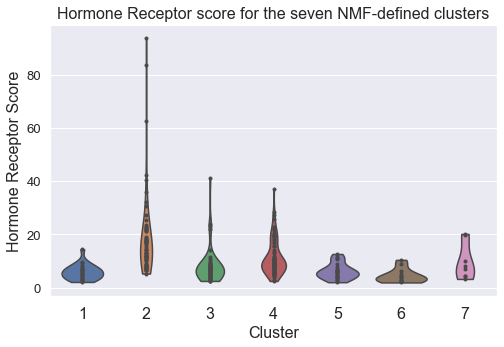

In [396]:
sns.set(font_scale = 1.2)
ax = sns.violinplot(data=data_to_plot,cut=0,
                    #scale='width',
                    inner='points')

#sns.set_context("paper")
#sns.despine(offset=10, trim=True)
#ax.set_xticklabels(['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'])
ax.set_xticklabels(['1','2','3','4','5','6','7'],fontsize=16)
ax.set_title(score_name+ ' score for the seven NMF-defined clusters', fontsize=16)
ax.set_ylabel(score_name+' Score',fontsize=16)
ax.set_xlabel('Cluster',fontsize=16)

#sns.despine()
#plt.grid()
#plt.savefig('fig6_violin/Violin_'+score_name+'_.png', dpi=300, bbox_inches='tight')

In [1]:
###### violii plots for derived features/

In [1]:
import numpy as np
import pandas as pd
import time
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})

In [2]:
d_path = 'ssBRCA/heatmapanalysis/'
x1 = np.loadtxt(fname=d_path+"data/259p_clinical4.csv",delimiter=",",skiprows=1)
x2 = np.loadtxt(fname=d_path+"data/259p_phenotypic27.csv",delimiter=",",skiprows=1)
x3 = np.loadtxt(fname=d_path+"data/259p_micro273.csv",delimiter=",",skiprows=1)
x4 = np.loadtxt(fname=d_path+"data/259p_tumor105.csv",delimiter=",",skiprows=1)


In [3]:
x = x2

x = x[:, (x != 0).any(axis=0)] # remove 5 features which are all zero



print(x.shape)

(259, 27)


In [4]:
############ now include clusters indices
####new cluster assignments 0-indexed
clus_1 = [12, 28, 36, 53, 65, 70, 111, 114, 140, 153, 156, 175, 180, 185, 203, 207, 211, 229, 232, 233, 234, 236, 241]
clus_2 = [0, 1, 6, 8, 16, 18, 20, 24, 26, 32, 33, 34, 37, 38, 39, 41, 45, 46, 48, 50, 52, 55, 57, 58, 61, 62, 68, 73, 81, 82, 85, 87, 89, 91, 98, 99, 120, 127, 131, 138, 144, 145, 146, 155, 157, 166, 170, 176, 182, 184, 187, 189, 195, 198, 201, 204, 206, 223, 225, 231, 237, 242, 248, 249, 258]
clus_3 = [4, 5, 7, 11, 13, 14, 17, 19, 21, 30, 43, 47, 54, 63, 67, 69, 75, 78, 79, 83, 84, 86, 93, 94, 102, 103, 107, 110, 113, 125, 128, 133, 135, 136, 139, 142, 143, 148, 159, 161, 164, 169, 179, 194, 210, 213, 216, 239, 246, 252, 253]
clus_4 = [2, 9, 15, 29, 31, 35, 40, 44, 49, 51, 59, 66, 72, 74, 77, 88, 90, 92, 95, 101, 104, 105, 109, 112, 116, 119, 121, 122, 123, 126, 129, 134, 137, 141, 147, 150, 158, 162, 165, 167, 171, 173, 177, 178, 183, 186, 188, 190, 191, 192, 193, 197, 199, 202, 205, 209, 212, 214, 215, 217, 218, 219, 221, 222, 224, 226, 227, 228, 235, 244, 247, 250, 251, 255, 256, 257]
clus_5 = [22, 23, 25, 76, 97, 115, 117, 124, 132, 149, 152, 154, 163, 172, 181, 196, 208, 220, 230, 238, 243, 245, 254]
clus_6 = [10, 27, 42, 64, 71, 80, 96, 118, 130, 151, 168, 200, 240]
clus_7 = [3,56, 60, 100, 106, 108, 160, 174]


In [5]:
#### 27 phenotypic features
fnames = pd.read_csv(d_path+'data/259p_phenotypic27.csv').columns

In [44]:
# ###### 273 microenvironment interaction features
# temp = pd.read_csv(d_path+"data/259p_micro273.csv")
# temp = temp.loc[:, (temp != 0).any(axis=0)]
# fnames = temp.columns

In [39]:
# ######
# temp = pd.read_csv(d_path+"data/259p_tumor105.csv")
# temp = temp.loc[:, (temp != 0).any(axis=0)]
# fnames = temp.columns

In [6]:
fnames

Index(['B_Cell_1', 'T_B_Cells', 'T_Cell_1', 'Macrophage_1', 'T_Cell_2',
       'Macrophage_2', 'Endothelial', 'Vimentin-hi', 'Small_Circular',
       'Small_Elongated', 'Fibronectin-hi', 'Large_Elongated',
       'SMA_hi_Vimentin', 'Hypoxic', 'Apoptotic', 'Proliferative',
       'p53+_EGFR+', 'Basal_CK', 'CK7+_CKhi_Cadherin', 'CK7+_CK+',
       'Epithelial-low', 'CK-low_HR-low', 'CK+_HR-hi', 'CK+_HR+',
       'CK_HRlow_p53+', 'Cklow_HR-hi', 'Myoepithelial'],
      dtype='object')

In [49]:
### LOOP
for i in tqdm(range(len(fnames))):
    biomarker = x[:,i]
    bio_1 = biomarker[clus_1]
    bio_2 = biomarker[clus_2]
    bio_3 = biomarker[clus_3]
    bio_4 = biomarker[clus_4]
    bio_5 = biomarker[clus_5]
    bio_6 = biomarker[clus_6]
    bio_7 = biomarker[clus_7]
    ## combine these different collections into a list
    data_to_plot = [bio_1, bio_2, bio_3, bio_4, bio_5, bio_6, bio_7]
    
    score_name = fnames[i]
    #print(score_name)
               
    sns.set(font_scale = 1.2)
    ax = sns.violinplot(data=data_to_plot,cut=0,
                        scale='width',
                        inner='points')

    #sns.set_context("paper")
    #sns.despine(offset=10, trim=True)
    ax.set_xticklabels(['1','2','3','4','5','6','7'],fontsize=16)
    ax.set_title(score_name+ ' score for the seven NMF-defined clusters', fontsize=16)
    ax.set_ylabel(score_name+' Score',fontsize=16)
    ax.set_xlabel('Cluster',fontsize=16)

    #sns.despine()
    #plt.grid()
    plt.savefig('fig6_violin/phen27_1/Violin_'+score_name+'_.png', dpi=300, bbox_inches='tight')
    #plt.savefig('fig6_violin/micro268_1/Violin_'+score_name+'_.png', dpi=300, bbox_inches='tight')
    #plt.savefig('fig6_violin/tumor105_1/Violin_'+score_name+'_.png', dpi=300, bbox_inches='tight')
    plt.clf()

100%|██████████| 27/27 [00:28<00:00,  1.07s/it]


<Figure size 576x360 with 0 Axes>